In [212]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import load_model

In [144]:
data = pd.read_excel("merc.xlsx")
data.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [146]:
len(data)

13119

In [147]:
data.columns

Index(['year', 'price', 'transmission', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

In [148]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [149]:
data.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


C:\Users\90531\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

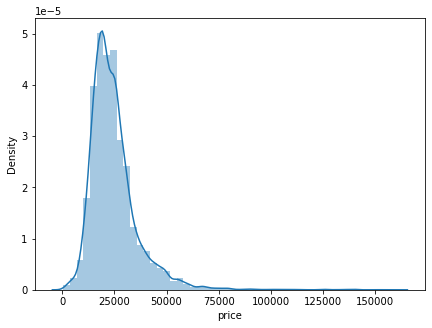

In [150]:
plt.figure(figsize = (7, 5))
sbn.distplot(data["price"])  ## graph of columns

C:\Users\90531\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

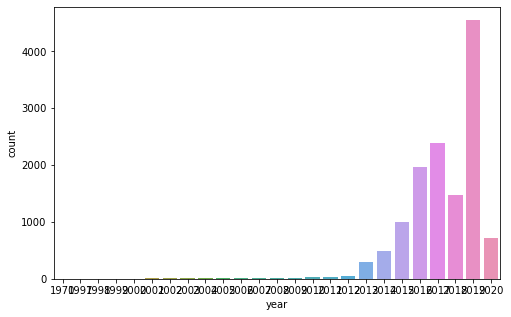

In [151]:
plt.figure(figsize = (8, 5))
sbn.countplot(data["year"])

In [152]:
data.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

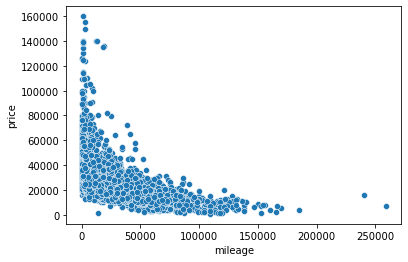

In [153]:
sbn.scatterplot(x = "mileage", y = "price", data = data)

In [154]:
data.sort_values("price", ascending = False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [155]:
data.sort_values("price", ascending = True).head(20)
#data.sort_values("price", ascending = False).tail(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [156]:
len(data) * 0.01   ## %99 luk kısmı alıcaz cunku bazıları fiyatta problem yaratıyor.

131.19

In [157]:
new_data = data.sort_values("price", ascending = False).iloc[131:, :]
new_data.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [158]:
new_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\90531\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

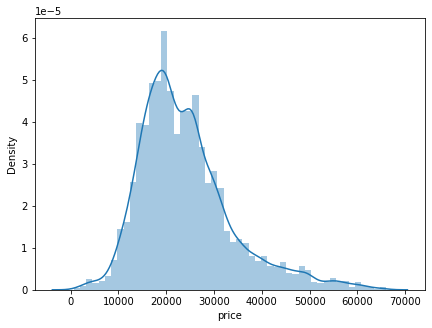

In [159]:
plt.figure(figsize = (7, 5))
sbn.distplot(new_data["price"])  ## graph of columns
## daha guzel bir dağilim elde ettik.

In [160]:
data.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [161]:
new_data.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [162]:
data[data.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [163]:
new_data = new_data[new_data.year != 1970]
new_data.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [164]:
new_data = new_data.drop(["transmission"], axis = 1)
## drop transmission column
new_data.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [165]:
y = new_data["price"].values
type(y)  ## array

numpy.ndarray

In [166]:
y.shape

(12987,)

In [167]:
x = new_data.drop(["price"], axis = 1).values
type(x)

numpy.ndarray

In [168]:
x.shape

(12987, 5)

In [169]:
y[1:6]

array([65990, 65980, 65000, 64999, 64999], dtype=int64)

In [170]:
x[1:6]

array([[2.0200e+03, 9.9900e+02, 1.4500e+02, 2.8000e+01, 4.0000e+00],
       [2.0200e+03, 3.9990e+03, 1.4500e+02, 2.8000e+01, 4.0000e+00],
       [2.0190e+03, 3.3980e+03, 1.4500e+02, 2.7200e+01, 4.0000e+00],
       [2.0190e+03, 1.1900e+02, 1.4500e+02, 4.0900e+01, 3.0000e+00],
       [2.0180e+03, 4.1102e+04, 1.4500e+02, 2.3000e+01, 5.5000e+00]])

In [171]:
## test and train
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [172]:
x_test.shape

(3897, 5)

In [173]:
x_train.shape

(9090, 5)

In [174]:
y_train.shape

(9090,)

In [175]:
y_true.shape

(3897,)

In [176]:
## scaling
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)  ## transform

In [177]:
x_test[1:6]

array([[0.86363636, 0.11412399, 0.03448276, 0.33781764, 0.24193548],
       [0.77272727, 0.24324032, 0.21551724, 0.27603388, 0.33870968],
       [0.95454545, 0.03794609, 0.25      , 0.26507225, 0.32258065],
       [0.77272727, 0.12605068, 0.        , 0.36472347, 0.24193548],
       [0.77272727, 0.25891606, 0.03448276, 0.33781764, 0.33870968]])

In [178]:
## layers
model = Sequential()

model.add(Dense(15, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(15, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse") # rmsprop

In [179]:
model.fit(x = x_train, y = y_train, validation_data = (x_test, y_true), batch_size = 256, epochs = 300)

Epoch 1/300
36/36 [==============================] - 2s 9ms/step - loss: 684405504.0000 - val_loss: 659505984.0000
Epoch 2/300
36/36 [==============================] - 0s 4ms/step - loss: 684386496.0000 - val_loss: 659477312.0000
Epoch 3/300
36/36 [==============================] - 0s 4ms/step - loss: 684331520.0000 - val_loss: 659380736.0000
Epoch 4/300
36/36 [==============================] - 0s 4ms/step - loss: 684148992.0000 - val_loss: 659065344.0000
Epoch 5/300
36/36 [==============================] - 0s 4ms/step - loss: 683546304.0000 - val_loss: 658034304.0000
Epoch 6/300
36/36 [==============================] - 0s 4ms/step - loss: 681754944.0000 - val_loss: 655218496.0000
Epoch 7/300
36/36 [==============================] - 0s 4ms/step - loss: 677263680.0000 - val_loss: 648615168.0000
Epoch 8/300
36/36 [==============================] - 0s 4ms/step - loss: 667548608.0000 - val_loss: 635163008.0000
Epoch 9/300
36/36 [==============================] - 0s 4ms/step - loss: 6488082

36/36 [==============================] - 0s 4ms/step - loss: 63243608.0000 - val_loss: 59265068.0000
Epoch 73/300
36/36 [==============================] - 0s 4ms/step - loss: 62657088.0000 - val_loss: 58675364.0000
Epoch 74/300
36/36 [==============================] - 0s 4ms/step - loss: 62042096.0000 - val_loss: 58111664.0000
Epoch 75/300
36/36 [==============================] - 0s 4ms/step - loss: 61427136.0000 - val_loss: 57487064.0000
Epoch 76/300
36/36 [==============================] - 0s 4ms/step - loss: 60811512.0000 - val_loss: 56924776.0000
Epoch 77/300
36/36 [==============================] - 0s 4ms/step - loss: 60173880.0000 - val_loss: 56288344.0000
Epoch 78/300
36/36 [==============================] - 0s 4ms/step - loss: 59531908.0000 - val_loss: 55639024.0000
Epoch 79/300
36/36 [==============================] - 0s 4ms/step - loss: 58877332.0000 - val_loss: 55000900.0000
Epoch 80/300
36/36 [==============================] - 0s 4ms/step - loss: 58208800.0000 - val_loss: 5

36/36 [==============================] - 0s 4ms/step - loss: 23719740.0000 - val_loss: 22134754.0000
Epoch 144/300
36/36 [==============================] - 0s 4ms/step - loss: 23605216.0000 - val_loss: 22080928.0000
Epoch 145/300
36/36 [==============================] - 0s 4ms/step - loss: 23502436.0000 - val_loss: 21884952.0000
Epoch 146/300
36/36 [==============================] - 0s 4ms/step - loss: 23381086.0000 - val_loss: 22370954.0000
Epoch 147/300
36/36 [==============================] - 0s 4ms/step - loss: 23338004.0000 - val_loss: 21757544.0000
Epoch 148/300
36/36 [==============================] - 0s 4ms/step - loss: 23219220.0000 - val_loss: 21671136.0000
Epoch 149/300
36/36 [==============================] - 0s 4ms/step - loss: 23161816.0000 - val_loss: 21597040.0000
Epoch 150/300
36/36 [==============================] - 0s 4ms/step - loss: 23070220.0000 - val_loss: 21769986.0000
Epoch 151/300
36/36 [==============================] - 0s 4ms/step - loss: 23006922.0000 - val

36/36 [==============================] - 0s 4ms/step - loss: 20805238.0000 - val_loss: 19438850.0000
Epoch 215/300
36/36 [==============================] - 0s 4ms/step - loss: 20761846.0000 - val_loss: 19578734.0000
Epoch 216/300
36/36 [==============================] - 0s 4ms/step - loss: 20750510.0000 - val_loss: 19601778.0000
Epoch 217/300
36/36 [==============================] - 0s 4ms/step - loss: 20724244.0000 - val_loss: 19677828.0000
Epoch 218/300
36/36 [==============================] - 0s 4ms/step - loss: 20724912.0000 - val_loss: 19451870.0000
Epoch 219/300
36/36 [==============================] - 0s 4ms/step - loss: 20747918.0000 - val_loss: 19642438.0000
Epoch 220/300
36/36 [==============================] - 0s 4ms/step - loss: 20696310.0000 - val_loss: 19624036.0000
Epoch 221/300
36/36 [==============================] - 0s 4ms/step - loss: 20677192.0000 - val_loss: 19395774.0000
Epoch 222/300
36/36 [==============================] - 0s 4ms/step - loss: 20666254.0000 - val

36/36 [==============================] - 0s 6ms/step - loss: 19910974.0000 - val_loss: 18808338.0000
Epoch 286/300
36/36 [==============================] - 0s 5ms/step - loss: 19921276.0000 - val_loss: 18770040.0000
Epoch 287/300
36/36 [==============================] - 0s 6ms/step - loss: 19911200.0000 - val_loss: 18884414.0000
Epoch 288/300
36/36 [==============================] - 0s 4ms/step - loss: 19914754.0000 - val_loss: 18744920.0000
Epoch 289/300
36/36 [==============================] - 0s 4ms/step - loss: 19881422.0000 - val_loss: 18654506.0000
Epoch 290/300
36/36 [==============================] - 0s 4ms/step - loss: 19879862.0000 - val_loss: 18741044.0000
Epoch 291/300
36/36 [==============================] - 0s 4ms/step - loss: 19883234.0000 - val_loss: 18646720.0000
Epoch 292/300
36/36 [==============================] - 0s 4ms/step - loss: 19850918.0000 - val_loss: 18665208.0000
Epoch 293/300
36/36 [==============================] - 0s 4ms/step - loss: 19835262.0000 - val

In [180]:
loss_values = pd.DataFrame(model.history.history)
loss_values.head()

,loss,val_loss
0,684405504.0,659505984.0
1,684386496.0,659477312.0
2,684331520.0,659380736.0
3,684148992.0,659065344.0
4,683546304.0,658034304.0


<AxesSubplot:>

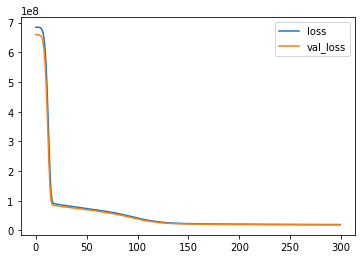

In [181]:
loss_values.plot()

In [182]:
## scores
y_pred = model.predict(x_test)
y_pred

122/122 [==============================] - 0s 1ms/step


array([[22775.31 ],
       [16152.508],
       [14678.225],
       ...,
       [22928.607],
       [17153.635],
       [26092.955]], dtype=float32)

In [183]:
abs_mean = mean_absolute_error(y_true, y_pred)
sqrd_mean = mean_squared_error(y_true, y_pred)

In [184]:
abs_mean

3066.273257041424

In [185]:
sqrd_mean

18689807.13882043

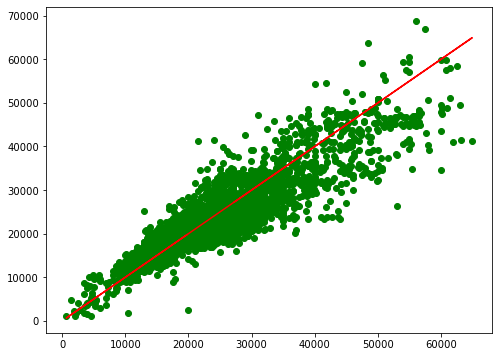

In [186]:
plt.figure(figsize = (8, 6))
plt.scatter(y_true, y_pred, color = "g")
plt.plot(y_true, y_true, "r-")

In [187]:
test_data = new_data.iloc[10]  ## for test
test_data
type(test_data)

pandas.core.series.Series

In [188]:
test_data

year           2020.0
price         64359.0
mileage        1000.0
tax             145.0
mpg              29.5
engineSize        3.0
Name: 8869, dtype: float64

In [203]:
#new_data = new_data.drop(new_data.iloc[10,:])
test_data = new_data.drop("price", axis = 1).iloc[10]
test_data

year          2020.0
mileage       1000.0
tax            145.0
mpg             29.5
engineSize       3.0
Name: 8869, dtype: float64

In [204]:
type(test_data)

pandas.core.series.Series

In [205]:
test_data.shape

(5,)

In [206]:
test_data = test_data.values

In [207]:
test_data = test_data.reshape(-1,5)
test_data.shape

(1, 5)

In [208]:
test_data = scale.transform(test_data)

In [209]:
model.predict(test_data)

1/1 [==============================] - 0s 12ms/step


array([[51061.836]], dtype=float32)

In [213]:
## save model
model.save("car.h5")

In [214]:
## call the model
new_model = load_model("car.h5")
new_test = scale.transform([[2020, 1100, 145, 30, 3.0]])
new_model.predict(new_test)

1/1 [==============================] - 0s 66ms/step


array([[50876.418]], dtype=float32)

In [ ]:
## Modelin buldugu sonuc gercek degere cok yakın degil.